In [1]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.signal import find_peaks

# Update matplotlib settings
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False
})
plt.rcParams['font.size'] = 14

## Task 1

In [32]:
# Get the current working directory
cwd = os.getcwd()

# Get the path to the Task 1 folder
path = os.path.join(cwd, 'Task 1')

# Get the list of files in the Task 1 folder
files = os.listdir(path)

# Initialize the list of data
data = []

# Loop through the files in the Task 1 folder
for file in files:
    # Check if the file is a .asc file
    if file.endswith('.asc'):
        # Get the path to the file
        file_path = os.path.join(path, file)
        
        # Open the file
        with open(file_path, 'r') as f:
            # Read the lines of the file
            lines = f.readlines()
            
            # Initialize the data list for the current file
            file_data = []
            
            # Loop through the lines of the file
            for line in lines:
                # Check if the line contains the data
                if line.startswith('#DATA'):
                    # Get the index of the line
                    index = lines.index(line)
                    
                    # Loop through the lines after the line that says #DATA
                    for i in range(index + 1, len(lines)):
                        # Replace commas with dots in the line
                        line = lines[i].replace('.', '.')
                        
                        # Split the line into values and convert them to floats
                        values = [float(value) for value in line.split()]
                        
                        # Append the values to the file data list
                        file_data.append(values)
            
            # Append the file name and file data to the data list
            data.append((file, file_data))


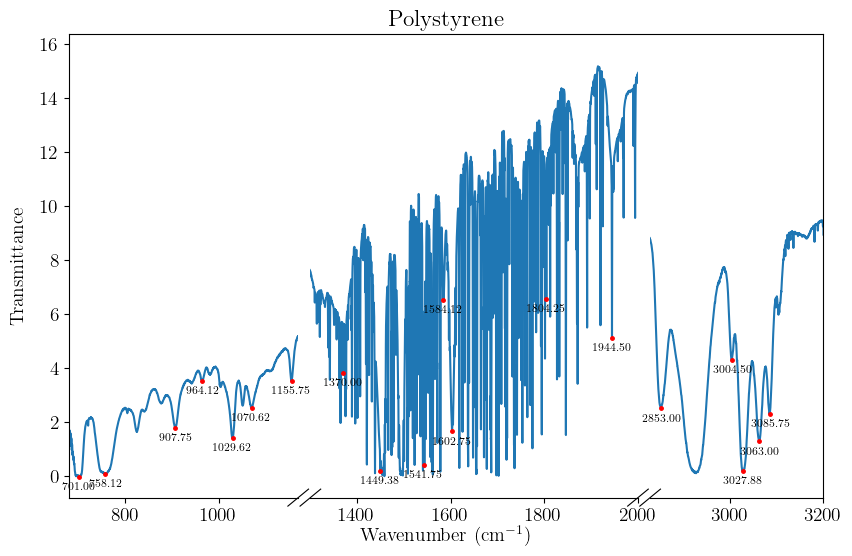

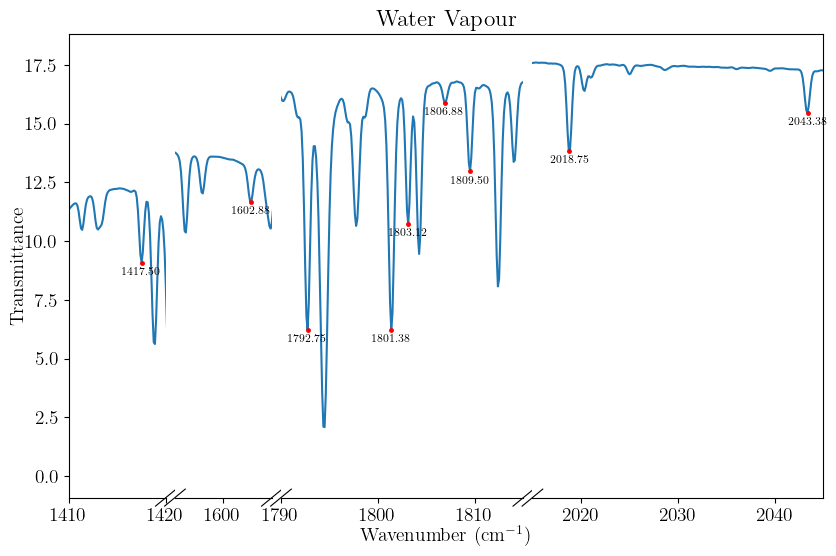

In [150]:
from brokenaxes import brokenaxes

# Define the peak ranges for Water vapor and Polystyrene
peak_ranges = {
    'Water Vapour': [1416.08, 1601.20, 1792.65, 1799.61, 1802.47, 1807.70, 1810.62, 2018.32, 2041.3],
    'Polystyrene': [699.45, 756.58, 842.0, 906.8, 965.7, 1028.3, 1069.1, 1154.6, 1368.5, 1449.7, 1542.2, 1583.1, 1601.4, 1803.8, 1945.2, 2850.0, 2920.9, 3001.4, 3026.4, 3060.0, 3082.2]
}

# Function to find dips within a specified range
def find_dips_in_range(x, y, dip_values):
    inverted_y = -y
    dips, _ = find_peaks(inverted_y, prominence=0.3)
    closest_dips = []
    for dip in dip_values:
        closest_dip = min(dips, key=lambda d: abs(x[d] - dip))
        if abs(x[closest_dip] - dip) < 4:
            closest_dips.append(closest_dip)
    return closest_dips

# Plot all data individually
for file, file_data in data:
    # Convert the data to a numpy array
    data_array = np.vstack(file_data)
    
    # Get the time and voltage data
    x = data_array[:, 0]
    y = data_array[:, 1]
    
    # Create a new figure with broken axes
    if 'Water' in file:
        bax = brokenaxes(xlims=((1410, 1420), (1595, 1605), (1790, 1815), (2015, 2045)), wspace=.05)
    else:
        bax = brokenaxes(xlims=((680,1170), (1300, 2000), (2830, 3200)), wspace=.05)

    # Plot the voltage data
    bax.plot(x, y)
    
    # Remove the .asc extension from the file name
    file_name_without_ext = os.path.splitext(file)[0]
    
    # Set the title of the plot
    bax.set_title(file_name_without_ext)
    
    # Set the labels of the x and y axes
    bax.set_xlabel('Wavenumber (cm$^{-1}$)', labelpad=20)
    bax.set_ylabel('Transmittance')
    bax.fig.set_size_inches(set_size(469*1.5))
    
    # Check if the file name matches any key in the peak_ranges dictionary
    for key, dip_values in peak_ranges.items():
        if key in file_name_without_ext:
            # Find dips within the specified range
            dips_in_range = find_dips_in_range(x, y, dip_values)
            # Plot the dips
            bax.plot(x[dips_in_range], y[dips_in_range], ".", color="red", markersize=5)
            # Annotate the dips
            for dip in dips_in_range:
                bax.text(x[dip], y[dip] - 0.2, f'{x[dip]:.2f}', ha='center', va='top', fontsize=8)
            break
        
    bax.big_ax.spines['right'].set_visible(True)
    bax.big_ax.spines['top'].set_visible(True)
    

    plt.show()